# LDA and QDA code

There is a DA (discriminant analysis) class in the Week8.ipynb file with further capabilities (LDA, QDA, regularization, and shrinkage), but we provide some more basic classes for LDA/QDA here.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [21]:
class LDA:        
    def fit(self, X, Y):
        # find the unique labels
        uniqueY = np.unique(Y)
        
        # find the dimensions
        n = X.shape[0]
        self.d = X.shape[1]
        self.k = uniqueY.shape[0]
        
        # initialize the variables
        self.prior = np.zeros([self.k, 1])
        self.mu = np.zeros([self.k, self.d])
        
        # compute the covariance matrix
        mu = np.mean(X, axis = 0)
        Xbar = X - mu
        self.Sig = (1/n) * Xbar.T @ Xbar
        self.invCov = np.linalg.inv(self.Sig)
        
        # compute class means and prior probabilities
        for i, y in enumerate(uniqueY):           
            # extract a class of datapoints from X
            Xi = X[Y == y]
                        
            # compute the size of each class
            ni = Xi.shape[0]
            
            # compute the priors
            self.prior[i] = ni / n
            
            # compute the sample mean
            self.mu[i] = np.mean(Xi, axis = 0)

    def predict(self, X):
        n = X.shape[0]
        
        discriminants = np.zeros([n, self.k])
        
        for i, x in enumerate(X):
            x = np.atleast_2d(x).T
            
            for j in range(self.k):
                discriminants[i][j] = x.T @ self.invCov @ self.mu[j].T - (1/2) * self.mu[j] @ self.invCov @ self.mu[j].T + np.log(self.prior[j])

            
        predictions = np.argmax(discriminants, axis = 1)
        
        return predictions

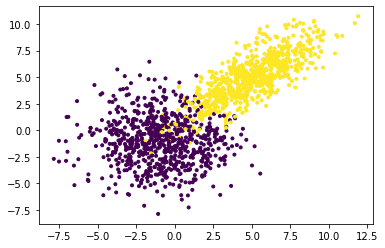

In [42]:
# number of points to generate
numberOfPoints = 1000

# generate points from class 0
mean1 = np.array([-1, -1])
covariance1 = np.array([[5, 0], [0, 5]])
X1 = np.random.multivariate_normal(mean1, covariance1, numberOfPoints)

# generate points from class 1
mean2 = np.array([5, 5])
covariance2 = np.array([[5, 4], [4, 5]])
X2 = np.random.multivariate_normal(mean2, covariance2, numberOfPoints)

# stack the points
X = np.vstack((X1, X2))

# create a vector of the labels
Y = np.hstack((numberOfPoints * [0], numberOfPoints * [1]))

# randomly choose 75% of the data to be the training set and 25% for the testing set
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25, random_state = 1)

# plot the training set
plt.scatter(trainX[:,0], trainX[:,1], c = trainY, marker = '.')


Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.98      0.96       255
           1       0.98      0.94      0.96       245

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500


Confusion Matrix:



<AxesSubplot:>

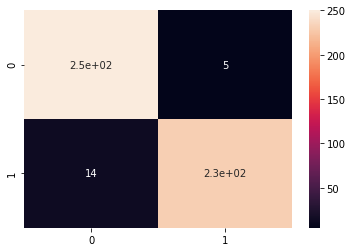

In [43]:
# fit the model to the training data
model = LDA()
model.fit(trainX,trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

In [44]:
class QDA:        
    def fit(self, X, Y):
        # find the unique labels
        uniqueY = np.unique(Y)
        
        # find the dimensions
        n = X.shape[0]
        self.d = X.shape[1]
        self.k = uniqueY.shape[0]
        
        # initialize the variables
        self.prior = np.zeros([self.k, 1])
        self.mu = np.zeros([self.k, self.d])
        self.Sigma = np.zeros([self.k, self.d, self.d])
        
        # compute class means and prior probabilities
        for i, y in enumerate(uniqueY):           
            # extract a class of datapoints from X
            Xi = X[Y == y]
                        
            # compute the size of each class
            ni = Xi.shape[0]
            
            # compute the priors
            self.prior[i] = ni / n
            
            # compute the sample mean
            self.mu[i] = np.mean(Xi, axis = 0)
            
            # compute the centered data
            XiBar = Xi - self.mu[i]
            
            # compute the sample covariance
            self.Sigma[i] = (1/ni) * XiBar.T @ XiBar

    def predict(self, X):
        n = X.shape[0]
        
        discriminants = np.zeros([n, self.k])
        
        for i, x in enumerate(X):
            x = np.atleast_2d(x).T
            
            for j in range(self.k):
                invCov = np.linalg.inv(self.Sigma[j])
                discriminants[i][j] = x.T @ invCov @ self.mu[j].T - (1/2) * self.mu[j] @ invCov @ self.mu[j].T + np.log(self.prior[j])
            
        predictions = np.argmax(discriminants, axis = 1)
        
        return predictions


Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.96      0.97       255
           1       0.96      0.97      0.97       245

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500


Confusion Matrix:



<AxesSubplot:>

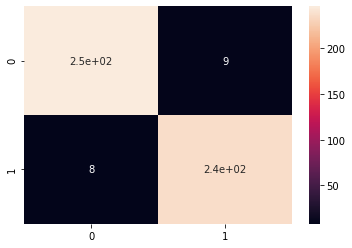

In [45]:
# fit the model to the training data
model = QDA()
model.fit(trainX,trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)